# Generating insights + Regression with thought process.
### This dataset contains the avg life expectancy data by country over time. The final goal is to graph the top 10 most populated countries and their life expectancy trends.
Dataset - https://www.kaggle.com/datasets/lashagoch/life-expectancy-who-updated/data

Imports

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns

Importing the data from csv

In [45]:
dataset = pd.read_csv('datasets/Life Expectancy Data.csv')
dataset.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7


Making a dataframe + cleaning the column names of excess space

In [13]:
df = pd.DataFrame(dataset)
df.columns = df.columns.str.strip()
df.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7


Creating a table of the top 10 most populated countries, grouping by country and finding the mean of 'Population_mln'

In [5]:
df_top_10_countries = df.groupby('Country')['Population_mln'].mean().reset_index()
df_top_10_countries = df_top_10_countries.nlargest(10, 'Population_mln')

df_top_10_countries

,Country,Population_mln
34,China,1321.239375
74,India,1188.605625
170,United States,302.103125
75,Indonesia,234.355625
22,Brazil,190.530000
123,Pakistan,170.185625
119,Nigeria,149.605000
133,Russian Federation,143.872500
12,Bangladesh,142.890625
82,Japan,127.628125


Checking population in some individual countries out of curiosity

In [14]:
usa = df[df['Country'] == 'United States'][['Year', 'Population_mln']]
usa = usa.sort_values(by='Year', ascending=True)
usa

,Year,Population_mln
352,2000,282.16
605,2001,284.97
1915,2002,287.63
1208,2003,290.11
2762,2004,292.81
2802,2005,295.52
2374,2006,298.38
1484,2007,301.23
2337,2008,304.09
595,2009,306.77


In [15]:
china = df[df['Country'] == 'China'][['Year', 'Population_mln']]
china = china.sort_values(by='Year', ascending=True)
china

,Year,Population_mln
1960,2000,1262.65
2043,2001,1271.85
1938,2002,1280.40
172,2003,1288.40
2024,2004,1296.08
766,2005,1303.72
2744,2006,1311.02
610,2007,1317.89
2526,2008,1324.66
1018,2009,1331.26


It appears all the data ranges from 2000 to 2015, which will make graphing these trends easier.

Graphing the final insights

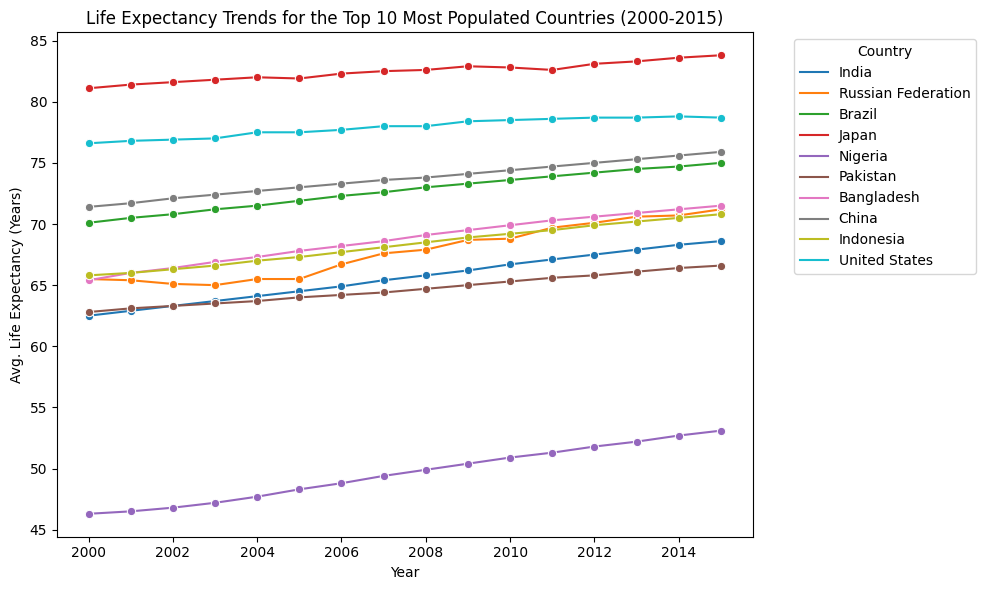

In [16]:
# Making a df only containing the data for the top 10 countries
top_10_list = df_top_10_countries['Country'].tolist()
df_top_10_life_expectancy = df[df['Country'].isin(top_10_list)]



# Seaborn for lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df_top_10_life_expectancy,
    x='Year',
    y='Life_expectancy',
    hue='Country',
    marker='o'
)

# Labeling axis and displaying the graph
plt.title('Life Expectancy Trends for the Top 10 Most Populated Countries (2000-2015)')
plt.xlabel('Year')
plt.ylabel('Avg. Life Expectancy (Years)')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



## Regression
Now I'm curious if alcohol consumption correlates with life expectancy by country, so I'll create a regression model. According to the creator of the dataset, alcohol consumption is measured by liters of pure alcohol per capita with 15+ year olds.

To start, I'll simply plot the two variables on a graph and see how it looks.

<Axes: xlabel='Alcohol_consumption', ylabel='Life_expectancy'>

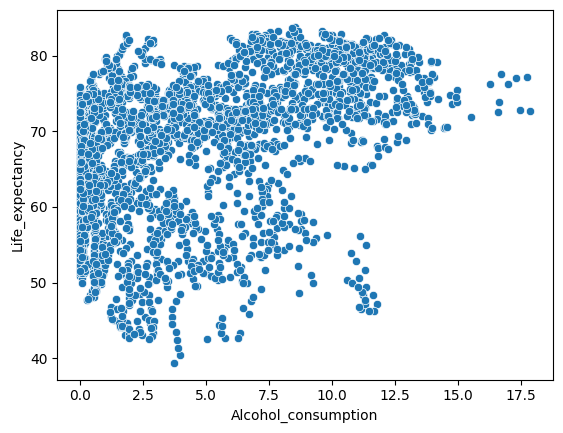

In [28]:
sns.scatterplot(df, x="Alcohol_consumption", y='Life_expectancy')

This seems crowded, so I'll limit the data to only the year 2015, and clean up the graph a bit. We'll also make it a regression model.

In [39]:
df2015 = df[df['Year'] == 2015]
df2015.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
6,Russian Federation,Rest of Europe,2015,6.6,8.2,223.0000,8.06,97,97,26.2,...,97,0.08,9313,144.10,2.3,2.3,12.0,0,1,71.2
27,Cameroon,Africa,2015,57.0,88.0,340.1265,4.55,84,64,24.3,...,84,1.12,1383,23.30,5.6,5.5,6.1,0,1,57.6
43,"Gambia, The",Africa,2015,39.7,59.8,261.7065,2.69,97,64,23.9,...,97,0.96,661,2.09,7.3,7.2,3.4,0,1,60.9


Text(0, 0.5, 'Avg. Life Expectancy (Years)')

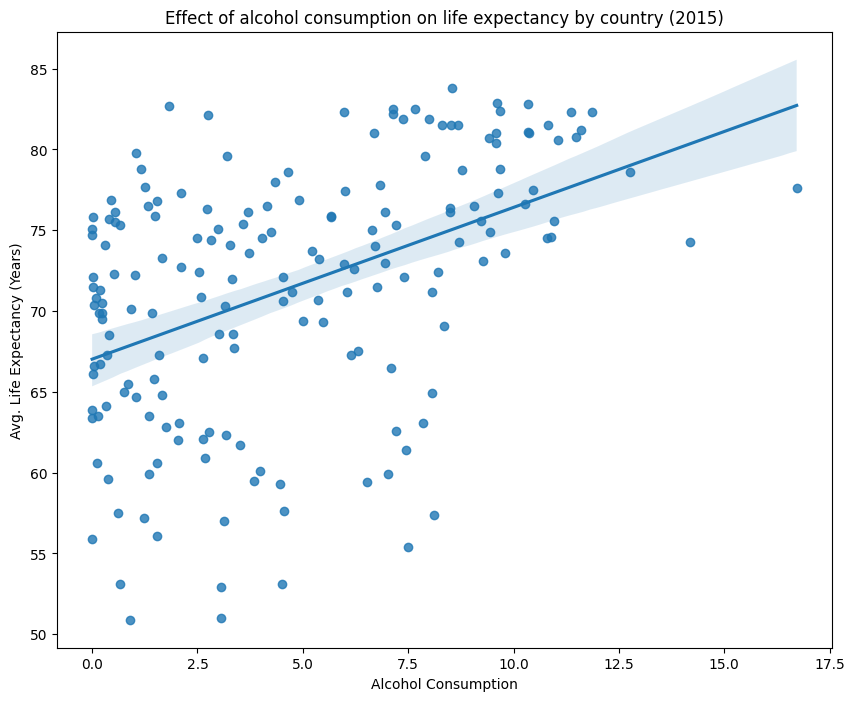

In [43]:
plt.figure(figsize=(10, 8))
sns.regplot(df2015, x="Alcohol_consumption", y='Life_expectancy')
plt.title('Effect of alcohol consumption on life expectancy by country (2015)')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Avg. Life Expectancy (Years)')

Surprisingly, it appears that a higher rate of alcohol consumption correlates with a higher avg life expectancy. This sounds odd, but it's likely influenced by a multitude of factors. Perhaps poorer countries with low life expectancies can't afford the luxury of alcohol nearly as much as richer countries. Perhaps there was an error in the data collection when measuring the alcohol consumption among 15+ year olds. Regardless, I believe this regression model can provide a pretty valuable insight into alcohol's place in human civilization.
